Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

Importing datasets

In [2]:
data1 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_train.csv', encoding = 'utf-8')
data2 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_test.csv', encoding = 'utf-8')
data3 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/calendar.csv', encoding = 'utf-8')
data4 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/inventory.csv', encoding = 'utf-8')
data5 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/solution.csv', encoding = 'utf-8')
data6 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/test_weights.csv', encoding = 'utf-8')
print("Datasets successfully imported")

Datasets successfully imported


checking dtypes of data1, changing date dtype

In [3]:
print(data1.info())
print(data1.isnull().sum())#info of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB
None
unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64


Finding number of null values and total number of values for data missing unique_ids

In [4]:
pd.set_option('display.max_rows', None)
null_count = data1[data1['total_orders'].isnull() & data1['sales'].isnull()]['date']
print(null_count)

154017     2021-05-23
154099     2021-05-21
154149     2021-05-24
154155     2021-05-22
429815     2021-12-10
429860     2021-12-09
733468     2021-06-27
734198     2021-06-26
738594     2021-05-29
738600     2021-05-23
738632     2021-05-31
738769     2021-05-22
738805     2021-05-30
738816     2021-05-21
738994     2021-05-24
1028203    2021-05-22
1028500    2021-05-23
1028566    2021-05-24
1028753    2021-05-21
1231189    2021-05-21
1231497    2021-05-23
1231500    2021-05-22
1231580    2021-05-29
1231636    2021-05-31
1231739    2021-05-24
1231755    2021-05-30
1451592    2021-06-20
1451661    2021-06-12
1451854    2021-07-04
1451892    2021-06-27
1452131    2021-06-19
1452275    2021-06-13
1452400    2021-07-11
1452632    2021-06-26
3464803    2021-05-23
3464921    2021-05-31
3464993    2021-05-21
3465006    2021-05-24
3465126    2021-05-30
3465135    2021-05-22
3465197    2021-05-29
3744049    2021-07-11
3860150    2021-06-12
3860232    2021-06-13
3862121    2021-12-09
3862202   

In [5]:
pd.set_option('display.max_rows', None)
matching_rows = data3[data3['date'].isin(null_count)][['date', 'holiday', 'warehouse']]
print(matching_rows)

             date  holiday    warehouse
230    2021-06-13        0     Munich_1
470    2021-07-04        0     Prague_1
776    2021-06-19        0   Budapest_1
1079   2021-12-09        0       Brno_1
1091   2021-12-10        0     Prague_2
1118   2021-07-04        0       Brno_1
1255   2021-06-26        0     Prague_3
1568   2021-05-22        0     Prague_1
1740   2021-05-31        0     Munich_1
2315   2021-07-04        0     Prague_2
2422   2021-12-09        0     Prague_2
2432   2021-07-11        0       Brno_1
2497   2021-06-27        0  Frankfurt_1
2548   2021-06-27        0     Prague_3
2553   2021-06-20        0     Munich_1
2561   2021-06-12        0   Budapest_1
3807   2021-06-20        0  Frankfurt_1
4733   2021-05-21        0  Frankfurt_1
5063   2021-05-24        1   Budapest_1
5120   2021-05-30        0     Prague_1
5126   2021-05-29        0       Brno_1
5182   2021-06-19        0     Prague_2
5221   2021-05-30        0   Budapest_1
5382   2021-05-31        0  Frankfurt_1


In [6]:
for date in null_count:
    data1.loc[data1['date'] == date, 'total_orders'] = data1.loc[data1['date'] == date, 'total_orders'].fillna(0)
    data1.loc[data1['date'] == date, 'sales'] = data1.loc[data1['date'] == date, 'sales'].fillna(0)
print(data1.isnull().sum())
print(data1.shape)

unique_id          0
date               0
warehouse          0
total_orders       0
sales              0
sell_price_main    0
availability       0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64
(4007419, 14)


Checking dtypes, null values of data2 and changing the dytypes of date column

In [7]:
print(data2.info())
print(data2.isnull().sum()) #info of test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB
None
unique_id          0
date               0
warehouse          0
total_orders       0
sell_price_main    0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_disco

In [8]:
data2.date.value_counts().sort_index()

date
2024-06-03    3386
2024-06-04    3417
2024-06-05    3450
2024-06-06    3439
2024-06-07    3419
2024-06-08    3362
2024-06-09    3294
2024-06-10    3315
2024-06-11    3323
2024-06-12    3360
2024-06-13    3349
2024-06-14    3353
2024-06-15    3309
2024-06-16    3245
Name: count, dtype: int64

Checking dtypes, null values of data3 and changing the dytypes of date column

In [9]:
print(data3.info())
print(data3.isnull().sum()) #info of calender set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB
None
date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64


Checking dtypes and null values in data4

In [10]:
print(data4.info())
print(data4.isnull().sum()) #info of inventory set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB
None
unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64


Checking dtypes and null values in data5

In [11]:
print(data5.info())
print(data5.isnull().sum()) #info of solution set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         47021 non-null  object
 1   sales_hat  47021 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.8+ KB
None
id           0
sales_hat    0
dtype: int64


Checking dtypes and null values in data6

In [12]:
print(data6.info())
print(data6.isnull().sum()) #info of test weights set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB
None
unique_id    0
weight       0
dtype: int64


In [13]:
merge1 = pd.merge(data1, data6, on='unique_id', how='left')
print(merge1.shape)

(4007419, 15)


In [14]:
merge2 = pd.merge(merge1, data3, on=['date', 'warehouse'], how='left')
print(merge2.shape)

(4007419, 20)


In [15]:
merge3 = pd.merge(merge2, data4, on=['unique_id', 'warehouse'], how='left')
print(merge3.shape)

(4007419, 26)


In [16]:
merge3['date'] = pd.to_datetime(merge3['date'], errors='coerce')
merge3['day'] = merge3['date'].dt.day
merge3['month'] = merge3['date'].dt.month
merge3['year'] = merge3['date'].dt.year
print(merge3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [17]:
merge4 = pd.merge(data2, data3, on=['date', 'warehouse'], how='left')
print(merge4.shape)

(47021, 17)


In [18]:
merge5 = pd.merge(merge4, data4, on=['unique_id', 'warehouse'], how='left')
print(merge5.shape)

(47021, 23)


In [19]:
merge5['date'] = pd.to_datetime(merge5['date'], errors='coerce')
merge5['day'] = merge5['date'].dt.day
merge5['month'] = merge5['date'].dt.month
merge5['year'] = merge5['date'].dt.year
print(merge5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unique_id               47021 non-null  int64         
 1   date                    47021 non-null  datetime64[ns]
 2   warehouse               47021 non-null  object        
 3   total_orders            47021 non-null  float64       
 4   sell_price_main         47021 non-null  float64       
 5   type_0_discount         47021 non-null  float64       
 6   type_1_discount         47021 non-null  float64       
 7   type_2_discount         47021 non-null  float64       
 8   type_3_discount         47021 non-null  float64       
 9   type_4_discount         47021 non-null  float64       
 10  type_5_discount         47021 non-null  float64       
 11  type_6_discount         47021 non-null  float64       
 12  holiday_name            477 non-null    object

In [20]:
merge3 = merge3.sort_values(by='date', ascending=True)
print(merge3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4007419 entries, 193957 to 1228599
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [21]:
warehouse_data = {}
for warehouse, df in merge3.groupby('warehouse'):
    warehouse_data[warehouse] = df
print(merge3['warehouse'].unique())

['Prague_1' 'Prague_2' 'Prague_3' 'Brno_1' 'Budapest_1' 'Munich_1'
 'Frankfurt_1']


For Budapest_1

Moving Average Addition Method

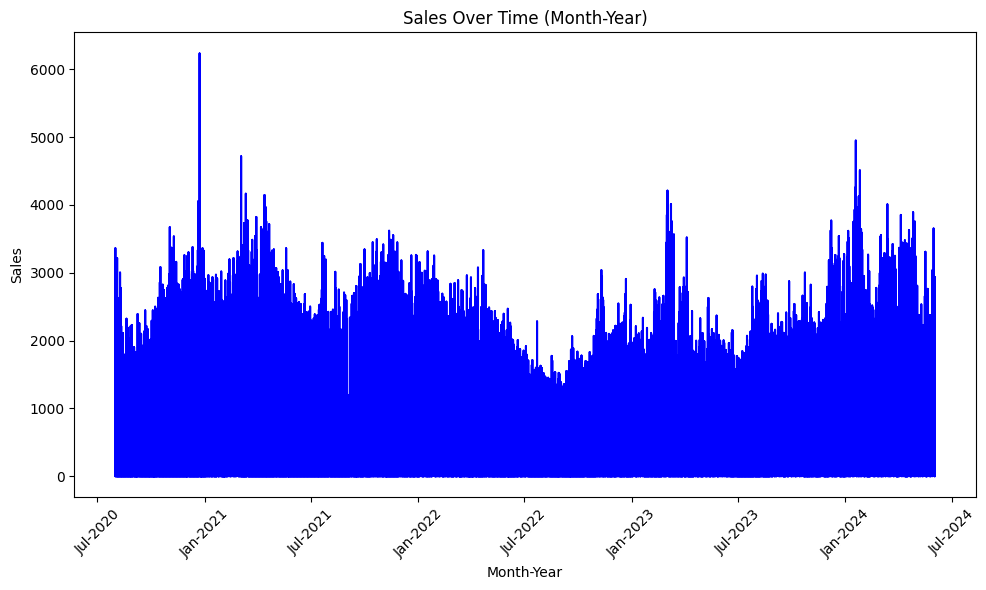

In [22]:
Budapest_1 = warehouse_data['Budapest_1']

Budapest_1['date'] = pd.to_datetime(Budapest_1['date'])

# Optionally, set the 'date' column as the index
Budapest_1.set_index('date', inplace=True)

# Plot the line graph with 'month-year' format
plt.figure(figsize=(10, 6))

# Plot sales against the date
plt.plot(Budapest_1.index, Budapest_1['sales'], label='Sales', color='b')

# Format the x-axis to show month-year (e.g., 'Jan-2022', 'Feb-2022')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add titles and labels
plt.title('Sales Over Time (Month-Year)')
plt.xlabel('Month-Year')
plt.ylabel('Sales')

# Show the plot
plt.tight_layout()  # To ensure everything fits well
plt.show()
